<a href="https://colab.research.google.com/github/prakashb-ai/programming/blob/main/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def read_file(filename):
  img = cv2.imread(filename)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.show()
  return img

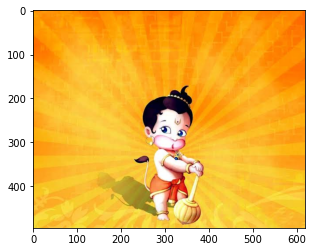

In [78]:
filename = '1.jpeg'
img = read_file(filename)
org_img = np.copy(img)

In [63]:
## CREATE EDGE MASK

def edge_mask(img,line_size,blur_value):
  gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  gray_blur = cv2.medianBlur(gray,blur_value)

  edges = cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,
                                line_size,blur_value)
  return edges



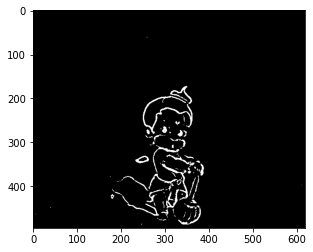

In [65]:
line_size,blur_value=7,7
edges =edge_mask(img,line_size,blur_value)

plt.imshow(edges ,cmap="binary")
plt.show()


In [52]:
##REDUCE THE COLOR PLATETTE
def color_qunatization(img,k):
  data = np.float32(img).reshape((-1,3))
  criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER,20,0.001)
  ret ,label ,center = cv2.kmeans(data, k,None ,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  result = center[label.flatten()]
  result = result.reshape(img.shape)
  return result

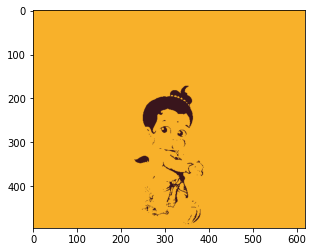

In [71]:
img = color_qunatization(img, k=9)

plt.imshow(img)
plt.show()

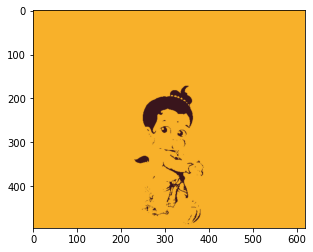

In [72]:
#REDUCE THE NOISE
blurred = cv2.bilateralFilter(img,d=3,sigmaColor=200,sigmaSpace=200)

plt.imshow(blurred)
plt.show()

In [79]:
##COMBINE EDGE MASK WITH THE QUANTIZ IMGAGE
def cartoon():
  c = cv2.bitwise_and(blurred,blurred,mask = edges)
  plt.imshow(org_img)
  plt.title("orginal image")
  plt.show()

  plt.imshow(c)
  plt.title("cartoonfied_image")
  plt.show()

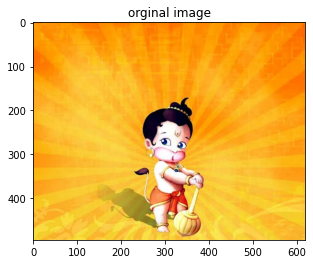

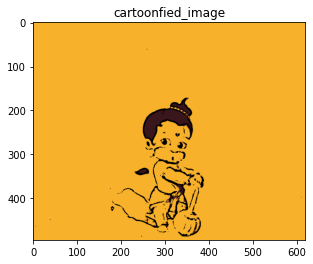

In [80]:
cartoon()